In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D

from keras.utils import np_utils
from sklearn.model_selection import train_test_split

from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import cm

import itertools

data_train = pd.read_csv('X_train_rakuten_afterEDA_preprocessing.csv',index_col=0)
data_train = data_train.reset_index(drop=False)
data_train['nom_img'] = r"C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\" + data_train['nom_img']
data_train.shape

Using TensorFlow backend.


(84613, 6)

In [2]:
#display columns including product images (nom_img)
data_train.head()

,designation_orig,nom_img,lang_designation,designation,prdtypecode,designation_token_final
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,C:\Users\admin\Documents\projet_Rakuten\croppe...,de,olivia: notebook personnalise / pages / punks...,10,"['notebook', 'page', 'design']"
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,C:\Users\admin\Documents\projet_Rakuten\croppe...,fr,journal des art (le) n° du // art et son ma...,2280,"['journal', 'art', 'art', 'marche', 'salon', '..."
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,C:\Users\admin\Documents\projet_Rakuten\croppe...,fr,grand stylet ergonomique bleu gamepad nintendo...,50,"['stylet', 'ergonomique', 'gamepad', 'nintendo..."
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,C:\Users\admin\Documents\projet_Rakuten\croppe...,fr,peluche donald europe disneyland (marionn...,1280,"['peluche', 'donald', 'europe', 'disneyland', ..."
4,La Guerre Des Tuques Luc a des idées de grande...,C:\Users\admin\Documents\projet_Rakuten\croppe...,fr,la guerre des tuques luc a des idees de grande...,2705,"['guerre', 'luc', 'idees', 'grandeur', 'vouloi..."


In [3]:
#delete rows where images are smaller than 2k equal to noise rather than information
from pathlib import Path

list_products_to_be_deleted_due_to_too_small_image = []
nbr_to_be_deleted = 0
for i in range(len(data_train)):
    fname = data_train['nom_img'].iloc[i]
    file_size =Path(fname).stat().st_size
    if (file_size < 2048):
        print("The file {0} has a too small size of {1} bytes ".format(fname,file_size))
        list_products_to_be_deleted_due_to_too_small_image.append(i)
        nbr_to_be_deleted += 1

#rows deletion
print("number of deleted rows due to image size smaller than 2K :",nbr_to_be_deleted)
print(data_train.shape)
data_train = data_train.drop(list_products_to_be_deleted_due_to_too_small_image)
print("new shape of dataset after preprocessing : ", data_train.shape)




The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_332521213_product_46540267.jpg has a too small size of 1597 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1289984514_product_4090784667.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1216298756_product_3479934811.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1026005405_product_558486639.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1252146802_product_3845529844.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1026005681_product_558486488.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1166709808_product_2823853943.jpg has a too small size of 0 bytes 
T

The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1211351615_product_3396526513.jpg has a too small size of 1590 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1264896275_product_3928053533.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1018396218_product_510785964.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1018395303_product_510784728.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1100804971_product_1736484207.jpg has a too small size of 1827 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1249535030_product_3819980401.jpg has a too small size of 1304 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1041185312_product_824465732.jpg has a too small size of 11

The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1045589330_product_293227446.jpg has a too small size of 2046 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1275705008_product_4006536216.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1169778890_product_2878038864.jpg has a too small size of 1353 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1302568721_product_4155424936.jpg has a too small size of 633 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_992767787_product_300566913.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1113097250_product_1832986981.jpg has a too small size of 742 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1005828507_product_418193051.jpg has a too small size of 15

The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1250261846_product_3831237327.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1026011651_product_558486945.jpg has a too small size of 683 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1203568974_product_3279391943.jpg has a too small size of 2011 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_941622258_product_207151544.jpg has a too small size of 2015 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1159687976_product_2718172568.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1323073274_product_4231410877.jpg has a too small size of 0 bytes 
The file C:\Users\admin\Documents\projet_Rakuten\cropped_image_train\\image_1265867405_product_3935345965.jpg has a too small size of 145

In [4]:
# study of definition of images available in Rakuten project
from pathlib import Path
nb_img_10kb = 0
nb_img_50kb = 0
nb_img_50_100kb = 0
nb_img_100_150kb = 0
nb_im_150kb = 0

for i in range(len(data_train)):
    fname = data_train['nom_img'].iloc[i]
    file_size =Path(fname).stat().st_size
    if (file_size < 51200):       
        nb_img_50kb += 1
        if (file_size < 10240):
            nb_img_10kb += 1
    elif (51200 <= file_size < 102400):
        nb_img_50_100kb +=1
    elif (102400 <= file_size < 153600):
        nb_img_100_150kb +=1
    else:
        nb_im_150kb +=1
print("amount of images with  size less than 50 kb :", nb_img_50kb)
print("amount of images with size higher than 50 kb :",nb_img_50_100kb + nb_img_100_150kb + nb_im_150kb )
print("Remember : 67.5 kb is the image size choosen as input to the ConvNet that is 150 * 150 pixels with 3 color channels")
print("amount of original images with size quite small , less than 10 kb : ",nb_img_10kb)

amount of images with  size less than 50 kb : 45726
amount of images with size higher than 50 kb : 38650
Remember : 67.5 kb is the image size choosen as input to the ConvNet that is 150 * 150 pixels with 3 color channels
amount of original images with size quite small , less than 10 kb :  3095


In [4]:
#only image names column and related class kept
target = data_train.prdtypecode
data_train = data_train.drop(['designation_orig','lang_designation','designation','designation_token_final','prdtypecode'],axis=1)

#Diviser aléatoirement les données en un ensemble d'entraînement et un ensemble de test 
X_train, X_test, y_train, y_test = train_test_split(data_train,target, test_size=0.2, random_state=66)

df_train = pd.concat([X_train,y_train],axis=1)
df_train = df_train.reset_index(drop=True)
df_test = pd.concat([X_test,y_test],axis=1)
df_test = df_test.reset_index(drop=True)

name_class = ['editions','magazines',"equipement_playstation","jouets_enfant","livres","fournitures_scolaires","materiel_jardin","mobilier_interieur","jeux_enfants","literie","livres_par_lot","figurine","materiel_piscine","univers_de_fiction","equipements_telecommandes","materiel_jeux_video","jeux_de_cartes_collection","decoration","jeux_video","console_de_jeu","materiel_bebe","peche_lampe_plein_air","materiel_animaux_compagnie","jeux_sur_PC","accessoires_outil","articles_nourriture","vetements_nouveau-né_et_billard_flechettes"] 
list_class = [10, 2280 ,  50 ,1280 ,2705, 2522, 2582, 1560, 1281, 1920, 2403, 1140, 2583, 1180, 1300 ,2462, 1160, 2060 , 40,   60 ,1320 ,1302 ,2220 ,2905, 2585, 1940 ,1301]       
list_class_onehot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

df_train['class_onehot']= 0
for i in range(len(df_train)):
    index = list_class.index(df_train['prdtypecode'].iloc[i])
    df_train['class_onehot'].iloc[i] = list_class_onehot[index]

df_test['class_onehot']= 0
for i in range(len(df_test)):
    index = list_class.index(df_test['prdtypecode'].iloc[i])
    df_test['class_onehot'].iloc[i] = list_class_onehot[index]

display(df_train.head())

print("\ndimension training set :",df_train.shape)
print("dimension test set :",df_test.shape)


C:\Users\admin\.conda\envs\tf-keras-gpu-test\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,nom_img,prdtypecode,class_onehot
0,C:\Users\admin\Documents\projet_Rakuten\croppe...,1302,21
1,C:\Users\admin\Documents\projet_Rakuten\croppe...,2403,10
2,C:\Users\admin\Documents\projet_Rakuten\croppe...,1280,3
3,C:\Users\admin\Documents\projet_Rakuten\croppe...,2280,1
4,C:\Users\admin\Documents\projet_Rakuten\croppe...,1302,21



dimension training set : (67500, 3)
dimension test set : (16876, 3)


In [5]:
# CNN model with input images expected in color (3 channels RGB ) and coded on (150,150) pixels 
# Big thought to historical LeNet-5 , one of the earliest pre-trained models 
# proposed by Yann LeCun and others in the year 1998.

# note : no dropout regularization used for the moment to avoid overfitting
model = Sequential()

first_layer = Conv2D(filters = 32,
                     kernel_size = (3, 3),
                     padding = 'valid',
                     input_shape = (150, 150, 3),
                     activation = 'relu')

second_layer = MaxPooling2D(pool_size = (2, 2))

third_layer = Conv2D(filters = 64,
                     kernel_size = (3, 3),
                     activation = 'relu')

fourth_layer = MaxPooling2D(pool_size = (2, 2))

fifth_layer = Conv2D(filters = 128,
                     kernel_size = (3, 3),
                     activation = 'relu')

sixth_layer = MaxPooling2D(pool_size = (2, 2))

seventh_layer = Conv2D(filters = 128,
                     kernel_size = (3, 3),
                     activation = 'relu')

eighth_layer = MaxPooling2D(pool_size = (2, 2))

ninth_layer = Flatten()

tenth_layer = Dense(units = 512,
                    activation = 'relu')

output_layer = Dense(units = 27,
                     activation='softmax')

model.add(first_layer)
model.add(second_layer)
model.add(third_layer)
model.add(fourth_layer)
model.add(fifth_layer)
model.add(sixth_layer)
model.add(seventh_layer)
model.add(eighth_layer)
model.add(ninth_layer)
model.add(tenth_layer)
model.add(output_layer)

In [6]:
#4 modules,blocks of feature map 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [7]:
model.compile(loss='categorical_crossentropy', # loss function multiclass             
              optimizer='adam',                # optimisation algorithm
              metrics=['accuracy'])            # evaluation metrics

In [5]:
# creation of customized Data Generator 

class CustomDataGen(tf.keras.utils.Sequence):
    def __init__(self, df, X_col, y_col,
                 batch_size,
                 input_size=(150, 150, 3),
                 shuffle=False):
        
        self.df = df.copy()
        self.X_col = X_col
        self.y_col = y_col
        self.batch_size = batch_size
        self.input_size = input_size
        self.shuffle = shuffle
        
        self.n = len(self.df)
        self.n_classes = df[y_col['class_onehot']].nunique()
        
    def on_epoch_end(self):
        pass
    
    def __get_input(self, path, target_size):
        
        image = tf.keras.preprocessing.image.load_img(path)
        image_arr = tf.keras.preprocessing.image.img_to_array(image)

        image_arr = tf.image.resize(image_arr,(target_size[0], target_size[1])).numpy()
        # shape of image_arr is (150,150,3)
        
        return image_arr/255.
    
    def __get_output(self, label, num_classes):
        return tf.keras.utils.to_categorical(label, num_classes=num_classes)
    
    def __get_data(self, batches):
        # Generates data containing batch_size samples

        image_batch = batches[self.X_col['nom_img']]
                
        class_batch = batches[self.y_col['class_onehot']]
        
        X_batch = np.asarray([self.__get_input(x, self.input_size) for x in image_batch])

        y_batch = np.asarray([self.__get_output(y, self.n_classes) for y in class_batch])
        
        return X_batch, y_batch
    
    def __getitem__(self, index):
        
        #index is manages by fit method
        batches = self.df[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = self.__get_data(batches)
        return X, y
    
    
    def __len__(self):
        return self.n // self.batch_size 
        

In [9]:
# training of the ConvNet 
import time
traingen = CustomDataGen(df_train,
                         X_col={'nom_img':'nom_img'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3))

valgen = CustomDataGen(df_test,
                       X_col={'nom_img':'nom_img'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3))
start = time.time()
history = model.fit(traingen,
          validation_data=valgen,
          epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

Epoch 1/10
2109/2109 [==============================] - 472s 224ms/step - loss: 2.5351 - accuracy: 0.2735 - val_loss: 1.7381 - val_accuracy: 0.3600
Epoch 2/10
2109/2109 [==============================] - 429s 204ms/step - loss: 2.0605 - accuracy: 0.4006 - val_loss: 1.7001 - val_accuracy: 0.4166
Epoch 3/10
2109/2109 [==============================] - 429s 203ms/step - loss: 1.7822 - accuracy: 0.4733 - val_loss: 1.6591 - val_accuracy: 0.4148
Epoch 4/10
2109/2109 [==============================] - 427s 202ms/step - loss: 1.5009 - accuracy: 0.5497 - val_loss: 1.6643 - val_accuracy: 0.4292
Epoch 5/10
2109/2109 [==============================] - 428s 203ms/step - loss: 1.2007 - accuracy: 0.6333 - val_loss: 2.0596 - val_accuracy: 0.4259
Epoch 6/10
2109/2109 [==============================] - 427s 203ms/step - loss: 0.9069 - accuracy: 0.7184 - val_loss: 2.5937 - val_accuracy: 0.4234
Epoch 7/10
2109/2109 [==============================] - 436s 207ms/step - loss: 0.6723 - accuracy: 0.7880 - val_

In [10]:
#good practise : always save model after training
model.save('Rakuten_baseline.h5')

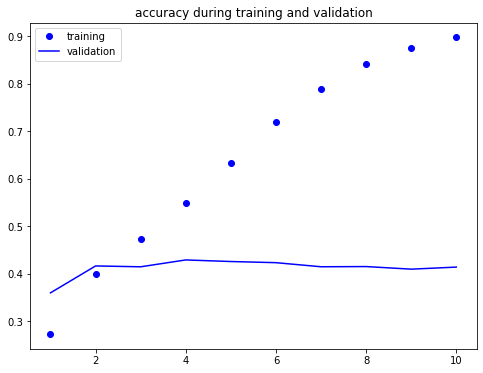

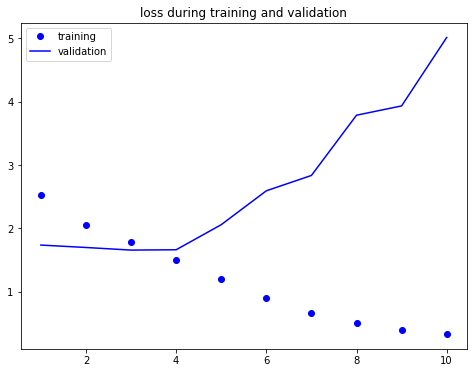

In [15]:
#display accuracy and loss for both training and validation set of images after epochs execution
#typical overfitting neural network 
#with accuracy increasing linearly on training set to almost reaching 100%
#and stabilized around 42% for validation 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.figure(figsize=(8,6))
plt.plot(epochs,acc,'bo',label='training')
plt.plot(epochs,val_acc,'b',label='validation')
plt.title('accuracy during training and validation for baseline CNN')
plt.legend();

plt.figure(figsize=(8,6))     
plt.plot(epochs,loss,'bo',label='training')
plt.plot(epochs,val_loss,'b',label='validation')
plt.title('loss during training and validation for baseline CNN')
plt.legend();

In [6]:
# CNN model with input images expected in color (3 channels RGB ) and coded on (150,150) pixels 
# Big thought to historical LeNet-5 , one of the earliest pre-trained models 
# proposed by Yann LeCun and others in the year 1998.

# note : with dropout regularization used to avoid partly overfitting
model1 = Sequential()

first_layer = Conv2D(filters = 32,
                     kernel_size = (3, 3),
                     padding = 'valid',
                     input_shape = (150, 150, 3),
                     activation = 'relu')

second_layer = MaxPooling2D(pool_size = (2, 2))

third_layer = Conv2D(filters = 64,
                     kernel_size = (3, 3),
                     activation = 'relu')

fourth_layer = MaxPooling2D(pool_size = (2, 2))

fifth_layer = Conv2D(filters = 128,
                     kernel_size = (3, 3),
                     activation = 'relu')

sixth_layer = MaxPooling2D(pool_size = (2, 2))

seventh_layer = Conv2D(filters = 128,
                     kernel_size = (3, 3),
                     activation = 'relu')

eighth_layer = MaxPooling2D(pool_size = (2, 2))

ninth_layer = Flatten()

tenth_layer = Dropout(0.5)

eleventh_layer = Dense(units = 512,
                    activation = 'relu')

output_layer = Dense(units = 27,
                     activation='softmax')

model1.add(first_layer)
model1.add(second_layer)
model1.add(third_layer)
model1.add(fourth_layer)
model1.add(fifth_layer)
model1.add(sixth_layer)
model1.add(seventh_layer)
model1.add(eighth_layer)
model1.add(ninth_layer)
model1.add(tenth_layer)
model1.add(eleventh_layer)
model1.add(output_layer)

In [7]:
#4 modules,blocks of feature map 
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [8]:
model1.compile(loss='categorical_crossentropy', # loss function multiclass             
              optimizer='adam',                # optimisation algorithm
              metrics=['accuracy'])            # evaluation metrics

In [9]:
# training of the ConvNet with Dropout for classifier input
import time
traingen = CustomDataGen(df_train,
                         X_col={'nom_img':'nom_img'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(150, 150, 3))

valgen = CustomDataGen(df_test,
                       X_col={'nom_img':'nom_img'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(150, 150, 3))
start = time.time()
history1 = model1.fit(traingen,
          validation_data=valgen,
          epochs=10)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

Epoch 1/10
2109/2109 [==============================] - 443s 210ms/step - loss: 2.5400 - accuracy: 0.2712 - val_loss: 2.0645 - val_accuracy: 0.3461
Epoch 2/10
2109/2109 [==============================] - 426s 202ms/step - loss: 2.1569 - accuracy: 0.3746 - val_loss: 1.7452 - val_accuracy: 0.4073
Epoch 3/10
2109/2109 [==============================] - 422s 200ms/step - loss: 1.9771 - accuracy: 0.4206 - val_loss: 1.7381 - val_accuracy: 0.4274
Epoch 4/10
2109/2109 [==============================] - 422s 200ms/step - loss: 1.8312 - accuracy: 0.4572 - val_loss: 1.7302 - val_accuracy: 0.4297
Epoch 5/10
2109/2109 [==============================] - 422s 200ms/step - loss: 1.7069 - accuracy: 0.4903 - val_loss: 1.4030 - val_accuracy: 0.4465
Epoch 6/10
2109/2109 [==============================] - 420s 199ms/step - loss: 1.5978 - accuracy: 0.5173 - val_loss: 1.5088 - val_accuracy: 0.4511
Epoch 7/10
2109/2109 [==============================] - 425s 202ms/step - loss: 1.4953 - accuracy: 0.5455 - val_

In [10]:
#good practise : always save model after training
model1.save('Rakuten_baseline_with_Dropout.h5')

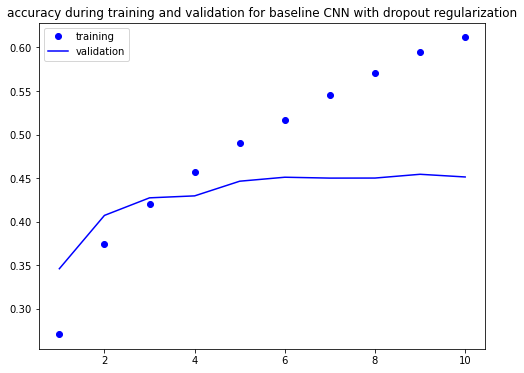

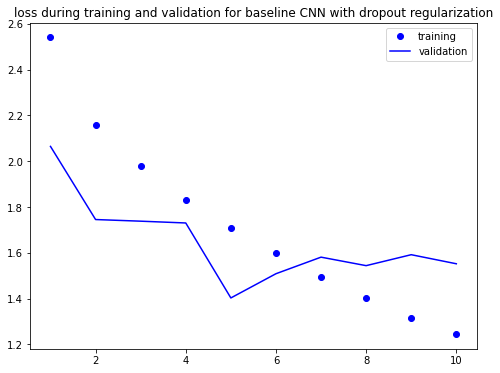

In [11]:
#display accuracy and loss for both training and validation set of images after epochs execution
#typical overfitting neural network but dropout effet is visible
#with accuracy increasing linearly on training set but its slope is less than pure CNN 
#(60% of accuracy after 10 epochs comparing with 90% of the model without the dropout)
#and stabilized around 45% for validation (3% better than pure CNN)
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs = range(1,len(acc1)+1)
plt.figure(figsize=(8,6))
plt.plot(epochs,acc1,'bo',label='training')
plt.plot(epochs,val_acc1,'b',label='validation')
plt.title('accuracy during training and validation for baseline CNN with dropout regularization')
plt.legend();

plt.figure(figsize=(8,6))     
plt.plot(epochs,loss1,'bo',label='training')
plt.plot(epochs,val_loss1,'b',label='validation')
plt.title('loss during training and validation for baseline CNN with dropout regularization')
plt.legend();

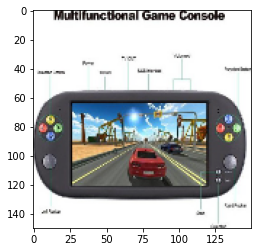

predicted probabilities of the 27 classes :
 [[3.8844178e-04 3.8118571e-05 2.1597662e-04 2.4368903e-03 1.0566720e-02
  2.2207780e-06 8.5158455e-05 3.4877907e-05 3.8836138e-06 2.1526153e-05
  1.4997761e-04 1.0777811e-05 1.2414291e-06 2.1438068e-06 5.5146246e-04
  3.0622954e-04 3.1338951e-07 1.3116463e-05 1.6205518e-04 9.8474771e-01
  2.8827615e-06 3.2690837e-06 1.3000564e-06 5.5394008e-05 1.6227957e-04
  1.4581930e-09 3.6069574e-05]]

predicted product class for this image : 60 console_de_jeu
      real Rakuten class               : 60 console_de_jeu


In [14]:
#elementary display of one image and its class prediction
from keras.models import load_model
model1_sav = load_model('Rakuten_baseline_with_Dropout.h5')

def transform_image(path, target_size):
    """function that converts an image into a tensor 4D"""
    image = tf.keras.preprocessing.image.load_img(path)
    image_arr = tf.keras.preprocessing.image.img_to_array(image)

    image_arr = tf.image.resize(image_arr,(target_size[0], target_size[1])).numpy()
    image_arr = np.expand_dims(image_arr,axis=0)
    
    return image_arr/255.

target_size = (150,150,3)
img_tensor = transform_image(df_test['nom_img'].iloc[2], target_size)
#print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

test_pred = model1_sav.predict(img_tensor)
num_classes = 27
y_test = tf.keras.utils.to_categorical(df_test['class_onehot'].iloc[2], num_classes=num_classes)

print("predicted probabilities of the 27 classes :\n",test_pred)
test_pred_class = test_pred.argmax(axis = 1)
y_test_class = y_test.argmax()
print("")
print("predicted product class for this image :",list_class[test_pred_class[0]], name_class[test_pred_class[0]])
print("      real Rakuten class               :",list_class[y_test_class], name_class[y_test_class])

y_test = tf.keras.utils.to_categorical(df_test['class_onehot'].iloc[2], num_classes=num_classes)


In [16]:
#Note : global prediction on df_test, data set not completely unknown as already used for model validation 
#methodology train, validation and test sets not strictly respected :-)

import time

test_pred_class = []
y_test_class = []
target_size = (150,150,3)
num_classes = 27

start = time.time()
for i in range(len(df_test)):
    img_tensor = transform_image(df_test['nom_img'].iloc[i], target_size)
    test_pred = model1_sav.predict(img_tensor)
    test_pred_class_img = test_pred.argmax(axis = 1)
    test_pred_class.append(list_class[test_pred_class_img[0]])
    
    y_test = tf.keras.utils.to_categorical(df_test['class_onehot'].iloc[i], num_classes=num_classes)
    y_test_class_img = y_test.argmax()
    y_test_class.append(list_class[y_test_class_img])
    
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')
    

print(metrics.classification_report(y_test_class, test_pred_class))


print("top 3 f1-score for classes :",name_class[list_class.index(1160)],name_class[list_class.index(2583)],name_class[list_class.index(1920)])



cell execution duration : 2.00 mn
              precision    recall  f1-score   support

          10       0.40      0.32      0.36       597
          40       0.50      0.40      0.45       509
          50       0.35      0.19      0.24       335
          60       0.37      0.35      0.36       179
        1140       0.42      0.36      0.39       512
        1160       0.82      0.79      0.81       774
        1180       0.34      0.21      0.26       160
        1280       0.29      0.29      0.29      1027
        1281       0.23      0.10      0.14       412
        1300       0.43      0.52      0.47      1008
        1301       0.49      0.37      0.42       160
        1302       0.28      0.18      0.22       514
        1320       0.26      0.31      0.28       633
        1560       0.36      0.46      0.40       990
        1920       0.67      0.60      0.63       837
        1940       0.35      0.47      0.40       150
        2060       0.31      0.21      0.25   

In [6]:
# CNN model with input images expected in color (3 channels RGB ) and coded on (80,80) pixels 
# note : with dropout regularization used to avoid partly overfitting
# 19.2 kb is the image size choosen as input to the ConvNet that is 80 x 80 pixels with 3 color channels")
#one layer of MaxPooling2D suppressed comparing ConvNet model using image size input (150 x 150)
model2 = Sequential()

first_layer = Conv2D(filters = 32,
                     kernel_size = (3, 3),
                     padding = 'valid',
                     input_shape = (80, 80, 3),
                     activation = 'relu')

third_layer = Conv2D(filters = 64,
                     kernel_size = (3, 3),
                     activation = 'relu')

fourth_layer = MaxPooling2D(pool_size = (2, 2))

fifth_layer = Conv2D(filters = 128,
                     kernel_size = (3, 3),
                     activation = 'relu')

sixth_layer = MaxPooling2D(pool_size = (2, 2))

seventh_layer = Conv2D(filters = 128,
                     kernel_size = (3, 3),
                     activation = 'relu')

eighth_layer = MaxPooling2D(pool_size = (2, 2))

ninth_layer = Flatten()

tenth_layer = Dropout(0.5)

eleventh_layer = Dense(units = 512,
                    activation = 'relu')

output_layer = Dense(units = 27,
                     activation='softmax')

model2.add(first_layer)
model2.add(third_layer)
model2.add(fourth_layer)
model2.add(fifth_layer)
model2.add(sixth_layer)
model2.add(seventh_layer)
model2.add(eighth_layer)
model2.add(ninth_layer)
model2.add(tenth_layer)
model2.add(eleventh_layer)
model2.add(output_layer)


In [7]:
#4 modules,blocks of feature map 
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 78, 78, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 76, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)        

In [8]:
model2.compile(loss='categorical_crossentropy', # loss function multiclass             
              optimizer='adam',                # optimisation algorithm
              metrics=['accuracy'])            # evaluation metrics

In [9]:
# training of the ConvNet with Dropout for classifier input 
# and input image smaller (80 x 80 pixels)
# and with 5 additional epochs
import time
traingen = CustomDataGen(df_train,
                         X_col={'nom_img':'nom_img'},
                         y_col={'class_onehot': 'class_onehot'},
                         batch_size=32, input_size=(80, 80, 3))

valgen = CustomDataGen(df_test,
                       X_col={'nom_img':'nom_img'},
                       y_col={'class_onehot': 'class_onehot'},
                       batch_size=32, input_size=(80, 80, 3))
start = time.time()
history2 = model2.fit(traingen,
          validation_data=valgen,
          epochs=15)
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

Epoch 1/15
2109/2109 [==============================] - 401s 190ms/step - loss: 2.5230 - accuracy: 0.2776 - val_loss: 1.9390 - val_accuracy: 0.3615
Epoch 2/15
2109/2109 [==============================] - 390s 185ms/step - loss: 2.1336 - accuracy: 0.3822 - val_loss: 1.8225 - val_accuracy: 0.4079
Epoch 3/15
2109/2109 [==============================] - 390s 185ms/step - loss: 1.9469 - accuracy: 0.4308 - val_loss: 1.7008 - val_accuracy: 0.4327
Epoch 4/15
2109/2109 [==============================] - 388s 184ms/step - loss: 1.7992 - accuracy: 0.4694 - val_loss: 1.7442 - val_accuracy: 0.4432
Epoch 5/15
2109/2109 [==============================] - 388s 184ms/step - loss: 1.6654 - accuracy: 0.5005 - val_loss: 1.6311 - val_accuracy: 0.4551
Epoch 6/15
2109/2109 [==============================] - 388s 184ms/step - loss: 1.5406 - accuracy: 0.5352 - val_loss: 1.6844 - val_accuracy: 0.4538
Epoch 7/15
2109/2109 [==============================] - 387s 184ms/step - loss: 1.4319 - accuracy: 0.5652 - val_

In [10]:
#good practise : always save model after training
model2.save('Rakuten_baseline_with_Dropout_image_80_80pixels.h5')

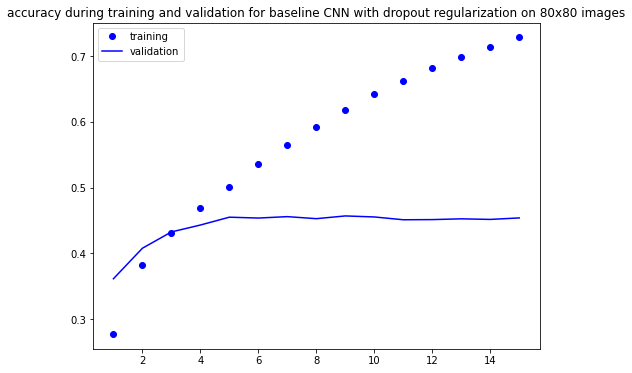

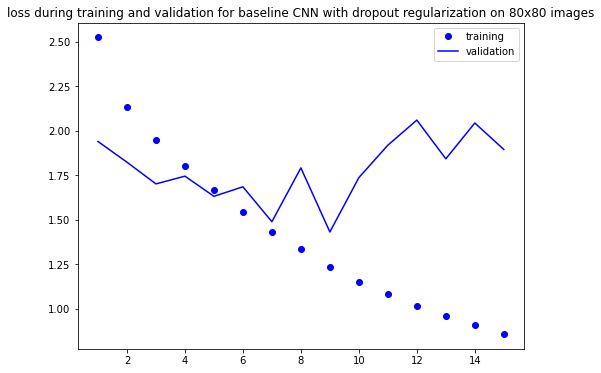

In [11]:
#display accuracy and loss for both training and validation set of images after epochs execution
#typical overfitting neural network but dropout effet is visible
#with accuracy increasing linearly on training set but its slope is less than pure CNN 
#(60% of accuracy after 15 epochs comparing with 90% of the model without the dropout)
#and stabilized also around 45% for validation (3% better than pure CNN)
#Usage of image size 80x80 rather 150x150 gives NO advantage 
#so pretrained VGG16 model based on image input size 150x150 pixels can be used 
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1,len(acc2)+1)
plt.figure(figsize=(8,6))
plt.plot(epochs,acc2,'bo',label='training')
plt.plot(epochs,val_acc2,'b',label='validation')
plt.title('accuracy during training and validation for baseline CNN with dropout regularization on 80x80 images')
plt.legend();

plt.figure(figsize=(8,6))     
plt.plot(epochs,loss2,'bo',label='training')
plt.plot(epochs,val_loss2,'b',label='validation')
plt.title('loss during training and validation for baseline CNN with dropout regularization on 80x80 images')
plt.legend();